# Task-2 : Linear Regression

The task is to predict a score obtained by the student based on the number of hours he studied.

### Import libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

### Extracting data

In [2]:
data = pd.read_csv('task2data.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
Hours = data.drop('Scores',axis='columns')
Scores = data.drop('Hours',axis = 'columns')

### Plot the graph for the variables

Text(0.5, 1.0, 'Student_Study_Hour_Prediction')

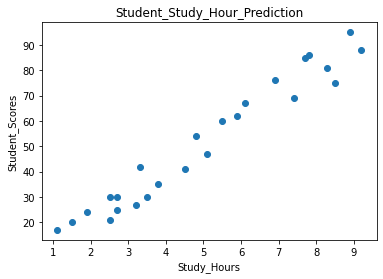

In [4]:
# Plotting the graph
plt.scatter(x = Hours, y = Scores)
plt.xlabel('Study_Hours')
plt.ylabel('Student_Scores')
plt.title('Student_Study_Hour_Prediction')

### Divide the given data into training data and testing data. 
##### Here my training data is 80% of the original data and testing data is 20% of the original data.

In [5]:
Hours_train,Hours_test,Scores_train,Scores_test = train_test_split(Hours, Scores, test_size = 0.2, random_state = 0)

### Implement the Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Hours_train,Scores_train)
lr.coef_,lr.intercept_

(array([[9.91065648]]), array([2.01816004]))

### Plot the regression line for the given data

Text(0.5, 1.0, 'Plotting Linear Regression line for complete data')

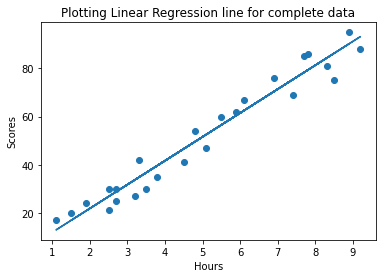

In [7]:
line = lr.coef_*Hours+lr.intercept_

plt.scatter(Hours, Scores)
plt.plot(Hours, line);
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Plotting Linear Regression line for complete data')

### Predict the scores for the testing data

In [8]:
Scores_predicted_test = lr.predict(Hours_test)
compare = pd.DataFrame(np.c_[Scores_test,Scores_predicted_test],columns = ["original score","predicted score"])
compare

,original score,predicted score
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


### Predict the scores for the training data

In [9]:
Scores_predicted = lr.predict(Hours_train)
compare_t = pd.DataFrame(np.c_[Scores_train,Scores_predicted],columns = ["original score","predicted score"])
compare_t

,original score,predicted score
0,35.0,39.678655
1,24.0,20.848407
2,86.0,79.321281
3,76.0,70.401690
4,17.0,12.919882
5,47.0,52.562508
6,85.0,78.330215
7,42.0,34.723326
8,81.0,84.276609
9,88.0,93.196200


### Compare the actual and predicted data using bar graph

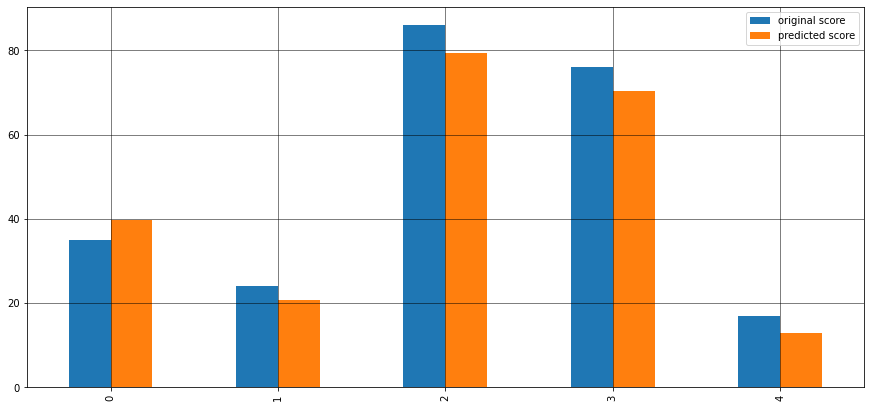

In [10]:
ds1 = compare_t.head()
ds1.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Predicting the score obtained by a student who studied for 9.25 hours

In [11]:
Spe_hour = np.array([9.25])
Spe_hour = Spe_hour.reshape(-1,1)
Spe_Score = lr.predict(Spe_hour)
print("Hours studied : {}".format(Spe_hour[0][0]))
print("Score obtained : {}".format(Spe_Score[0][0]))

Hours studied : 9.25
Score obtained : 93.69173248737538


### Evaluating the Regression Model

In [12]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Scores_test, Scores_predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(Scores_test, Scores_predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Scores_test, Scores_predicted_test)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
